In [7]:
#Constants and Units

a0 = 0.529 #Angstrom



In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#Path Integral Monte Carlo Method

def TSTEP(Ens,weight,locale):

    ebar = 0;
    wbar = 0;

    for i in range(Ensem):
        for j in range(3):
            config(j) = Ens(icord,i)
        Call_drift(confi,shift)
        for k in range(3):
            config(k) = config(k) + Gauss(k)*SWHBDT + SHIFT(k) 
        
        epsil = Eloc(config)
        Weight(i) = Weight(i)*np.exp(-epsil*DT)
        
        
    epsil = Ebar/ebar
    Norm = Nensem.Wbar
    
    for k in range(3):
        weight(k) = norm*weight(k)

SyntaxError: can't assign to function call (<ipython-input-1-927c23e12c88>, line 10)

In [43]:
def aeq(a,S):
    return a0/(1+ np.exp(-S/a))-a


#returns the value of a by solving the transcedental equation

def solvea(S,n=100):
    
    l,m=0.1,1 #Angstrom
    
    for i in range(n):
        
        fl=aeq(l,S)
        fm=aeq(m,S)
        
        
        p=(l+m)/2
        
        fp=aeq(p,S)
        
        if fl*fm<0:
            
            if fl*fp<0:
                m=p
            else:
                fp*fm<0
                l=p
        else:
               break

    return p

#When r is 3D


class Vec(object):
    def __init__(self, x, y, z):
        self.x, self.y, self.z = x, y, z

    def __array__(self, dtype=None):
        if dtype:
            return np.array([self.x, self.y, self.z], dtype=dtype)
        else:
            return np.array([self.x, self.y, self.z])
    def rL(self,S):
        Sv = [0,0,S/2]
        return np.abs(np.subtract(self,Sv))

    def rR(self,S):
        Sv = [0,0,S/2]
        return np.abs(np.add(self,Sv))  
    
    def rabs(self,other):
        return np.abs(np.subtract(self,other))

r1, r2 = Vec(0,1,0), Vec(0,0,1)

In [295]:
#r functions

def rL(r,S):
    return np.abs(r - S/2)

def rR(r,S):
    return np.abs(r + S/2)    



In [2]:
def functions(r,a,alpha,beta):
    
    chi = np.exp(-r/a);
    FDchi = -chi/a;
    SDchi = chia**2;
    lapchir = SDchi + 2.0*FDchi/r
    
    f = np.exp(r/(alpha*(1.0+beta*r)));
    fd = f/(alpha*(1.0+beta)**2);
    sf = fd**2/f - (2.0*beta*f)/(alpha*(1+beta*r)**3)
    lapf = sf+2*fd/r;
    
    
    
    
    


In [4]:
def r12(r1,r2):
    #euclidean distance
    X1 = r1[0];
    y1 = r1[1];
    z1 = r1[2];
    
    x2 = r2[0];
    y2 = r2[1];
    z2 = r2[2];
    
    return np.sqrt((x1-x2)**2 +(y1-y2)**2 + (z1-z2)**2)

In [297]:
#Wavefunction

def wavefunction(r1,r2,beta,S):
    
    alpha = 2*a0;
    a = solvea(S)
    
    phi1 = np.exp(-rL(r1,S)/a) + np.exp(-rR(r1,S)/a);
    phi2 = np.exp(-rL(r2,S)/a) + np.exp(-rR(r2,S)/a);
    
    r12 = np.abs(r1-r2);
    
    f = np.exp(r12/(alpha*(1+beta*r12)));
    
    phi = phi1*phi2*f;
    
    return phi**2;


In [530]:
#local energy


def epsilon2(r1,r2,beta,S):
    
    hbar2m = 3.78 #eV
    ke2A = 14.3 #eV
    
    r12 = np.abs(r1-r2);
    V = -ke2A*(1/rL(r1,S) + 1/rL(r2,S)+ 1/rR(r1,S)+ 1/rR(r2,S)) + 1/r12;
    
    h = 0.001 #ngstrom
    h2 = 1000000
    
    rplus1 = r1 + h;
    rplus2 = r2 + h;
    rminus1 = r1 - h;
    rminus2 = r2 - h;
    
    w1p = wavefunction(rplus1,r2,beta,S);
    w10 = wavefunction(r1,r2,beta,S);
    w1m = wavefunction(rminus1,r2,beta,S);
    
    w2p = wavefunction(r1,rplus2,beta,S);
    w20 = wavefunction(r1,r2,beta,S);
    w2m = wavefunction(r1,rminus2,beta,S);
    
    K = -0.5*h2*((w1m+w1p-2*w10) + (w2m+w2p-2*w20))
    K = hbar2m*K/w10
    
    
    return K+V

In [531]:
#local energy


def epsilon(r1,r2,beta,S):
    

    r12 = np.abs(r1-r2);
    V = -(1/rL(r1,S) + 1/rL(r2,S)+ 1/rR(r1,S)+ 1/rR(r2,S)) + 1/r12;
    
    h = 0.001 #ngstrom
    h2 = 1000000
    
    rplus1 = r1 + h;
    rplus2 = r2 + h;
    rminus1 = r1 - h;
    rminus2 = r2 - h;
    
    w1p = wavefunction(rplus1,r2,beta,S);
    w10 = wavefunction(r1,r2,beta,S);
    w1m = wavefunction(rminus1,r2,beta,S);
    
    w2p = wavefunction(r1,rplus2,beta,S);
    w20 = wavefunction(r1,r2,beta,S);
    w2m = wavefunction(r1,rminus2,beta,S);
    
   
    
    K = -0.5*h2*((w1m+w1p-2*w10) + (w2m+w2p-2*w20))
    K = K/w10
    
    
    return K+V

In [533]:
epsilon(np.array([0.5]),np.array([0.6]),-0.3,0.6)

array([-28.09141509])

In [535]:
#MCMC

def MCMCrun(r1,r2,step,beta,S):
    
    for i in range(3):
        rt1[i] = r1[i] + step*(2*np.random.rand()-1);
        rt2[i] = r2[i] + step*(2*np.random.rand()-1);
    
    eta = np.random.uniform(0,1);
    
    R = wavefunction(rt1,rt2,beta,S)/wavefunction(r1,r2,beta,S);
    
    #use acceptance ratio to evaluate efficiency
    
    if R>1:
        rnew1 = rt1;
        rnew2 = rt2;
        
    elif R>eta:
        rnew1 = rt1;
        rnew2 = rt2;
    else:
        rnew1 = r1;
        rnew2 = r2;
        
    return rnew1,rnew2

In [ ]:
MCMCrun(0,0,0.5,0.4,0.6)

In [571]:
def Erun(ri1,ri2,beta,S,delta,nsteps,therm):

    for i in range(thermal):
        ri1,ri2 = MCMCrun(ri1,ri2,delta,beta,S)
        
    r1 = [ri1];
    r2 = [ri2];  
    
    for i in range(nsteps):
        rn1,rn2 = MCMCrun(r1[i],r2[i],delta,beta,S)
        r1.append(rn1);
        r2.append(rn2);
        
    r1 = np.array(r1);
    r2 = np.array(r2);
    
    Elocal = epsilon(r1,r2,beta,S)
    
    #need to account for wavefunc normalization
    
    return np.mean(Elocal)
    

In [598]:
Erun(1,-1,0.1,0.7,0.529,1000,1000)

-66.94235769346103

In [601]:

r1 = 1
r2 = -1

    
beta = np.linspace(0,2,50)

Es = []

for i in beta:
    Es.append(Erun(r1,r2,i,0.7,0.5,10000,1000))
    
plt.plot(beta,Es,"r+")

KeyboardInterrupt: 

In [605]:
Sv = np.linspace(0,3,100)

beta = np.linspace(0,2,50)

U = []

#E0 is the ground state energy

for i in Sv:
    for j in beta:
        Es.append(Erun(r1,r2,j,i,0.5,1000000,1000))
    #find the minimum E (E0)
    #find corresponding beta
    
    #call a function to evaluate V(S)

    
#plot(s,U)
    

KeyboardInterrupt: 

In [ ]:
ri1=0.5
ri2=-0.5

thermalisation = 10000

for i in range(thermalisation):
    ri1,ri2 = MCMCrun(ri1,ri2,0.52,0.2,0.8)
    
    
nsteps = 100000

r1 = [ri1];
r2 = [ri2];


for i in range(nsteps):
    rn1,rn2 = MCMCrun(r1[i],r2[i],0.01,0.2,0.6)
    r1.append(rn1);
    r2.append(rn2);

In [555]:
ri1

0.5116485142669902

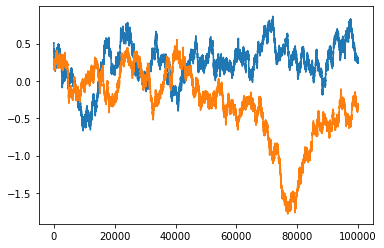

In [552]:
plt.plot(r1)
plt.plot(r2)

In [546]:
r1[-1]

0.2683202232343764

In [547]:
r2[-1]

-0.3536437125951655

In [548]:
r1 = np.array(r1)
r2 = np.array(r2)

(array([0.17897424, 0.34681585, 0.5641417 , 0.58219893, 0.66284386,
        0.97508999, 0.71909291, 0.71019746, 0.42809998, 0.1592125 ]),
 array([-0.83484629, -0.64711164, -0.459377  , -0.27164236, -0.08390772,
         0.10382692,  0.29156157,  0.47929621,  0.66703085,  0.85476549,
         1.04250013]),
 <BarContainer object of 10 artists>)

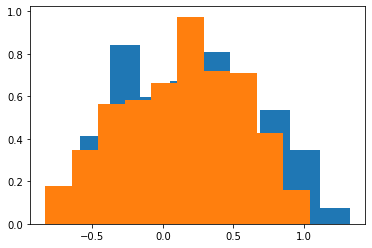

In [549]:
plt.hist(r1,density="True")
plt.hist(r2,density="True")

In [391]:
#finding E(integral)

Elocal = epsilon(r1,r2,0.2,0.6)

[0.36618211 0.36819731 0.3790547  ... 0.48625905 0.48811015 0.4976783 ]


In [392]:
np.mean(Elocal)

-1117.4173680859085

In [394]:
np.mean(wavefunction(r1,r2,0.2,0.6))

1.6613697135928231